# Cleaning of the books data
This notebook is for initial exploration of the datasets associated with this challenge. 

## imports 

In [1]:
import os, sys, glob # for loading, saving and manipulating files on disk
from pathlib import Path # Path allows us to list directory paths in a manner that's not affected by the OS the notebook is being run on 

import pandas as pd # to work with csv files as dataframes 
import numpy as np # for mathematical and scientific computations 

import matplotlib.pyplot as plt # for plots 
import seaborn as sns # also for plotting, it's a wrapper for several matplotlib functions, making them more accessible 

## loading data

In [2]:
data_dir = Path.home()/'projects'/'billups_data_challenge'/'Data Challenge' # specifies the directory with data files
out_dir = data_dir.parent/'cleaned_data' # directory for storing intermediate outputs such as cleaned data
out_dir.mkdir(exist_ok=True) #creating the output directory, while making sure it's not overwritten if it already exists

In [3]:
books_df = pd.read_csv(data_dir/'books.csv')

## investigating the data

### visual inspection

In [4]:
books_df.shape

(240, 8)

In [5]:
books_df.sample(10)

,id,title,authors,publisher,publishedDate,categories,price,pages
59,59sDAAAAMBAJ,Popular Mechanics,NaN,NaN,1960-01,NaN,212.99,457
19,qPTH2LBNcJEC,Advertising and Sales Promotion,NaN,Nirali Prakashan,1969,['Advertising'],434.99,421
200,s746AQAAIAAJ,Handbook on California's Natural Resources,['California. Resources Agency'],NaN,1968,['Conservation of natural resources'],305.99,696
45,heMDAAAAMBAJ,Popular Mechanics,NaN,NaN,1994-03,NaN,5.99,322
101,PkegAAAAMAAJ,Physico-clinical Medicine,NaN,NaN,1921,NaN,221.0,418
48,zTRBTjCv110C,Fracture Mechanics,"['Chin-Teh Sun', 'Z.-H. Jin']",Academic Press,2012,['Technology & Engineering'],78.0,341
28,1_1OtAEACAAJ,Breakthrough Advertising,['Eugene Schwartz'],NaN,2017-04-15,NaN,204.0,547
129,I50-AQAAMAAJ,The Commercial and Financial Chronicle,NaN,NaN,1905,['Banks and banking'],$419.0,721
103,_L9IAAAAYAAJ,Old Dominion Journal of Medicine and Surgery,NaN,NaN,1904,NaN,436.99,605
170,FTMAAAAAQAAJ,Corliss-engines and Allied Steam-motors Workin...,['Wilhelm Heinrich Uhland'],NaN,1879,['Corliss steam-engine'],274.99,648


### cleaning up prices and converting to numeric values

In [6]:
 #remove all non-numeric characters other than decimal
books_df['price'] = books_df['price'].str.replace(r'[^\d\.]', '').str.replace('nan.nan', '-99').astype(float)

/Users/garima/miniconda3/envs/reloc/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


### converting pages to numeric column

In [7]:
books_df['pages'] = books_df['pages'].str.replace(r'[^\d]', '').astype(int)

/Users/garima/miniconda3/envs/reloc/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


## merging books data with checkouts data 

In [8]:
checkouts_df = pd.read_csv(out_dir/'checkouts_cleaned.csv')

In [9]:
books_checkout_df = books_df.merge(checkouts_df, on='id', how='left') # equivalent to LEFT JOIN in SQL

In [10]:
books_checkout_df

,id,title,authors,publisher,publishedDate,categories,price,pages,patron_id,library_id,...,return_year,duration_borrowed_days,late_return_indicator,date_due,due_date_is_holiday,closest_holiday_distance,due_date_weekday,due_date_month,due_date_day,due_date_year
0,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320,466d78dd0a6e1beffc1ac2eb19fc17b4,226-222@5xc-jxj-7yv,...,2018,14,0,2018-02-14,0,5,2,2,14,2018
1,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320,461e2e6ed37fd8aef77f2e046d609452,23v-222@5xc-jv7-v4v,...,2018,9,0,2018-06-08,0,11,4,6,8,2018
2,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320,0f703ebd73b83ce69edd88c6018768d9,222-222@5xc-jvf-skf,...,2018,76622,1,1808-12-05,0,76363,0,12,5,1808
3,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320,b334b49df32aa1d4b758973161cd25d1,222-222@5xc-jvf-skf,...,2018,21,0,2018-02-06,0,13,1,2,6,2018
4,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320,93500f374fb5f330d47e89b30af648f5,226-222@5xc-jxj-7yv,...,2018,19,0,2018-05-03,0,25,3,5,3,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,lMkmAQAAMAAJ,Technical Report - South Carolina Marine Resou...,['South Carolina. Marine Resources Division'],NaN,1979,['Marine resources'],11.50,236,229b488196ef015c22104acb29381d31,23v-222@5xc-jv7-v4v,...,2018,23,0,2018-09-04,0,1,1,9,4,2018
1537,jPs8AAAAYAAJ,Water Resources Activities in the United States,['U.S. Congress. Senate. Select Committee on N...,NaN,1960,['Water resources development'],94.50,544,49f8498adaade1796907b5890e8c2307,228-222@5xc-jtz-hwk,...,2018,16,0,2018-04-06,0,46,4,4,6,2018
1538,jPs8AAAAYAAJ,Water Resources Activities in the United States,['U.S. Congress. Senate. Select Committee on N...,NaN,1960,['Water resources development'],94.50,544,cd27181d37d1268d48539a9379eb2edb,zzw-222@5xc-jv4-789,...,2018,7,0,2018-12-17,0,8,0,12,17,2018
1539,jPs8AAAAYAAJ,Water Resources Activities in the United States,['U.S. Congress. Senate. Select Committee on N...,NaN,1960,['Water resources development'],94.50,544,90524970074efa51cd94d6c510c02670,228-222@5xc-jtz-hwk,...,2018,20,0,2018-07-11,0,7,2,7,11,2018


In [11]:
late_returned_books = books_checkout_df[books_checkout_df['late_return_indicator']==1]
timely_returned_books = books_checkout_df[books_checkout_df['late_return_indicator']==0]

In [12]:
late_returned_books[late_returned_books['checkout_year']>2017].describe()

,price,pages,checkout_year,return_year,duration_borrowed_days,late_return_indicator,due_date_is_holiday,closest_holiday_distance,due_date_weekday,due_date_month,due_date_day,due_date_year
count,131.000000,132.000000,132.0,132.000000,132.000000,132.0,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,384.876947,709.295455,2018.0,2018.310606,105.666667,1.0,0.075758,12.560606,2.560606,6.227273,14.643939,2018.106061
std,144.640066,129.430328,0.0,0.464505,45.256127,0.0,0.265618,11.576007,1.804395,3.567433,9.147755,0.309088
min,14.000000,320.000000,2018.0,2018.000000,29.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000
25%,302.000000,635.000000,2018.0,2018.000000,63.000000,1.0,0.000000,3.000000,1.000000,3.000000,6.000000,2018.000000
50%,372.000000,697.000000,2018.0,2018.000000,102.000000,1.0,0.000000,8.500000,2.000000,6.000000,14.000000,2018.000000
75%,478.500000,780.000000,2018.0,2019.000000,146.250000,1.0,0.000000,17.000000,4.000000,9.000000,22.000000,2018.000000
max,721.000000,1154.000000,2018.0,2019.000000,179.000000,1.0,1.000000,47.000000,6.000000,12.000000,31.000000,2019.000000


In [13]:
timely_returned_books.describe()

,price,pages,checkout_year,return_year,duration_borrowed_days,late_return_indicator,due_date_is_holiday,closest_holiday_distance,due_date_weekday,due_date_month,due_date_day,due_date_year
count,1309.000000,1319.000000,1319.0,1319.000000,1319.000000,1319.0,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,297.168426,578.850644,2018.0,2018.039424,15.956027,0.0,0.030326,14.010614,2.976497,6.360121,15.771797,2018.078089
std,159.880953,169.654455,0.0,0.194675,6.621426,0.0,0.171548,11.800692,1.992450,3.419566,8.875394,0.268414
min,5.990000,124.000000,2018.0,2018.000000,5.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000
25%,182.500000,462.000000,2018.0,2018.000000,10.000000,0.0,0.000000,5.000000,1.000000,3.000000,8.000000,2018.000000
50%,296.990000,570.000000,2018.0,2018.000000,16.000000,0.0,0.000000,11.000000,3.000000,6.000000,16.000000,2018.000000
75%,393.990000,681.500000,2018.0,2018.000000,22.000000,0.0,0.000000,19.000000,5.000000,9.000000,24.000000,2018.000000
max,721.000000,1154.000000,2018.0,2019.000000,27.000000,0.0,1.000000,49.000000,6.000000,12.000000,31.000000,2019.000000


Some patterns worth noting: 
- books that are returned late are on average longer and more expensive (by approx 150 pages, and USD 90)
- the due dates for the books returned late are more likely to fall on a holiday (higher by 4 percentage points)

<AxesSubplot:xlabel='pages', ylabel='duration_borrowed_days'>

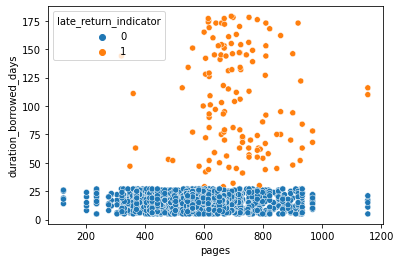

In [14]:
sns.scatterplot(x='pages', y='duration_borrowed_days', hue='late_return_indicator', data=books_checkout_df[books_checkout_df['checkout_year']>2000])

## saving cleaned books data to disk 
further analysis on this dataset would be done when merged with other datasets for feature engineering

In [15]:
books_df.to_csv(out_dir/'books_cleaned.csv', index=False)
books_checkout_df.to_csv(out_dir/'books_checkouts_merged.csv', index=False)

The books that are returned late (orange) are concentrated in the 600-1000 pages range, whereas the books returned on time are spread out more evenly. 